In [1]:
print(__doc__)
import numpy as np
import pandas as pd
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import tree


Automatically created module for IPython interactive environment


In [2]:
df=pd.read_csv("magic04_2.csv")

In [3]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

('Matriz', array([[1711,  345],
       [ 355,  760]]))
('MSE NNW', 0.22075055187637968)
             precision    recall  f1-score   support

          0       0.83      0.83      0.83      2056
          1       0.69      0.68      0.68      1115

avg / total       0.78      0.78      0.78      3171

('accuracy_score', 0.77924944812362029)
('Matriz', array([[1705,  351],
       [ 343,  772]]))
('MSE NNW', 0.21885840428886785)
             precision    recall  f1-score   support

          0       0.83      0.83      0.83      2056
          1       0.69      0.69      0.69      1115

avg / total       0.78      0.78      0.78      3171

('accuracy_score', 0.78114159571113218)
('Matriz', array([[1699,  356],
       [ 340,  775]]))
('MSE NNW', 0.21955835962145109)
             precision    recall  f1-score   support

          0       0.83      0.83      0.83      2055
          1       0.69      0.70      0.69      1115

avg / total       0.78      0.78      0.78      3170

('accuracy_

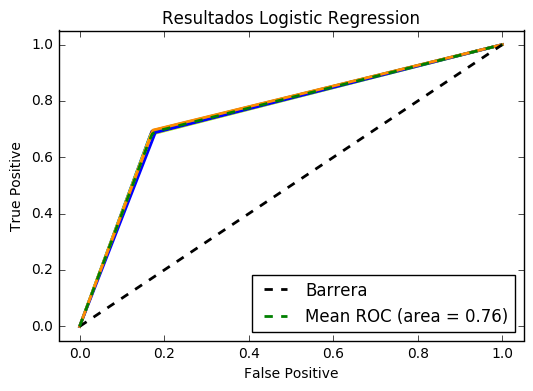

In [6]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
#classifier = LogisticRegression()
#classifier = tree.DecisionTreeClassifier()
classifier = svm.SVC(kernel='rbf',gamma=15, probability=True)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    MSE = mean_squared_error(y[test], probas_)  #AQUI
    y_true = y[test]
    y_predi = probas_
    cm=confusion_matrix(y[test], probas_)
    print('Matriz',cm)
    print('MSE NNW',MSE)
    print(classification_report(y_true, probas_))
    print('accuracy_score',accuracy_score(y_true, probas_))
    plt.plot(fpr, tpr, lw=lw, color=color)

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Barrera')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Resultados Logistic Regression')
plt.legend(loc="lower right")
plt.show()
